In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/Aishu/dl-model-extraction'

In [2]:
from attacker.training import *

# Parameters

## Case - 1

In [3]:
case1_cifar100 = {
        "query_size": [5000, 10000, 25000, 50000],
        "query_type": ['coreset','random'],
        "victim":[{"data": CIFAR_100, "model_name": RESNET50 }],
        "attacker":[RESNET34],
        "k_logits": [None]
}

# Investigations

## case - 1

PARAMETERS for investigation:
{'attacker': ['resnet34'],
 'k_logits': [None],
 'query_size': [5000, 10000, 25000, 50000],
 'query_type': ['coreset', 'random'],
 'victim': [{'data': 'cifar100', 'model_name': 'resnet50'}]}
---------------------------------------------------------------------------
Files already downloaded and verified
Files already downloaded and verified
Querying resnet50 victim on cifar100 dataset
	- input:10000 queried:10000 -victim acc: 0.7008999586105347
Sampling using None with query size 10000
	- input:10000 sampled:10000
Querying resnet50 victim on cifar100 dataset
	- input:50000 queried:50000 -victim acc: 0.9517399668693542
Sampling using coreset with query size 5000
	- input:50000 sampled:5000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: coreset	Query Size: 5000	Logits: None
-----------------------------------------------------------------------------


100%|█████████████████████████████████████████| 400/400 [39:47<00:00,  5.97s/it]


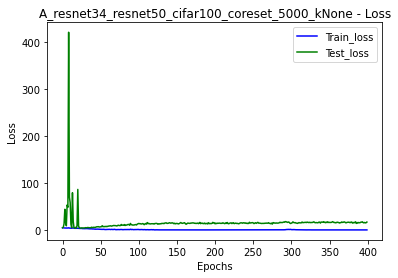

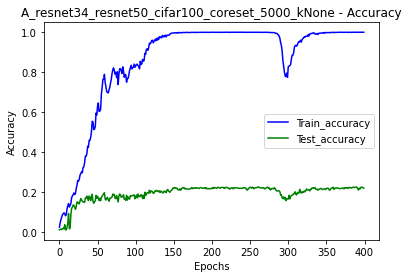

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 5000,
 'QueryType': 'coreset',
 'Test Accuracy': 21.94,
 'Test Loss': 16.7435,
 'Train Accuracy': 100.0,
 'Train Loss': 1e-04,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using coreset with query size 10000
	- input:50000 sampled:10000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: coreset	Query Size: 10000	Logits: None
-----------------------------------------------------------------------------


100%|█████████████████████████████████████████| 200/200 [31:25<00:00,  9.43s/it]


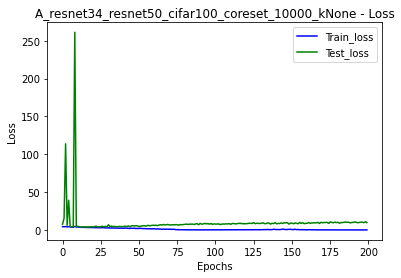

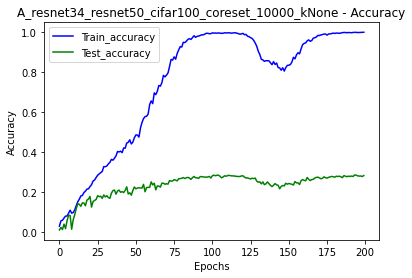

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 10000,
 'QueryType': 'coreset',
 'Test Accuracy': 28.28,
 'Test Loss': 9.6687,
 'Train Accuracy': 99.94,
 'Train Loss': 0.0069,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using coreset with query size 25000
	- input:50000 sampled:25000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: coreset	Query Size: 25000	Logits: None
-----------------------------------------------------------------------------


100%|███████████████████████████████████████████| 80/80 [26:28<00:00, 19.85s/it]


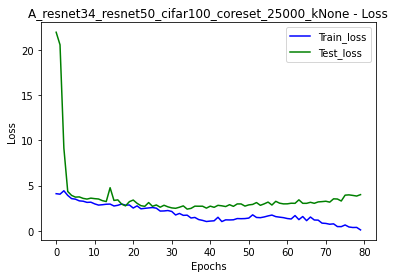

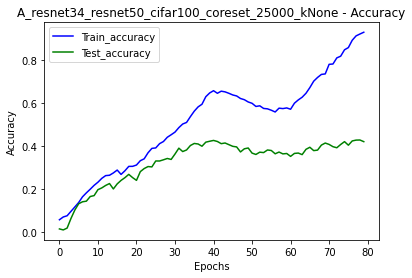

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 25000,
 'QueryType': 'coreset',
 'Test Accuracy': 42.04,
 'Test Loss': 3.9969,
 'Train Accuracy': 92.8,
 'Train Loss': 0.1016,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using coreset with query size 50000
	- input:50000 sampled:50000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: coreset	Query Size: 50000	Logits: None
-----------------------------------------------------------------------------


100%|███████████████████████████████████████████| 40/40 [24:52<00:00, 37.30s/it]


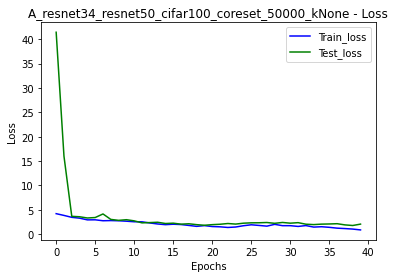

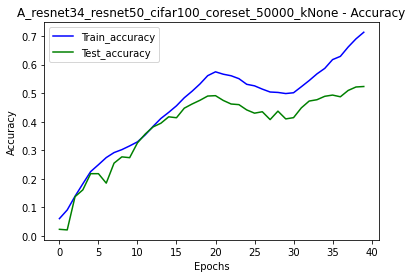

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 50000,
 'QueryType': 'coreset',
 'Test Accuracy': 52.32,
 'Test Loss': 2.071,
 'Train Accuracy': 71.33,
 'Train Loss': 0.8808,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using random with query size 5000
	- input:50000 sampled:5000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: random	Query Size: 5000	Logits: None
-----------------------------------------------------------------------------


100%|█████████████████████████████████████████| 400/400 [39:35<00:00,  5.94s/it]


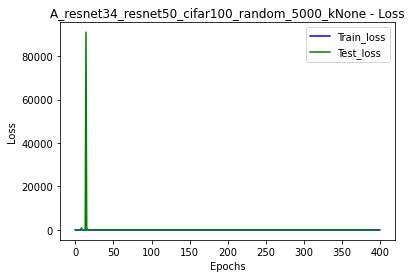

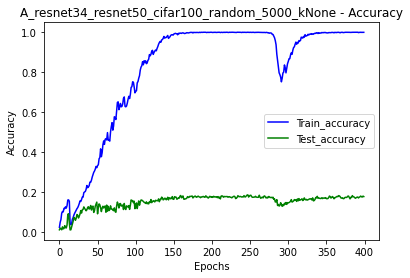

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 5000,
 'QueryType': 'random',
 'Test Accuracy': 17.73,
 'Test Loss': 15.7732,
 'Train Accuracy': 99.96,
 'Train Loss': 0.0009,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using random with query size 10000
	- input:50000 sampled:10000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: random	Query Size: 10000	Logits: None
-----------------------------------------------------------------------------


100%|█████████████████████████████████████████| 200/200 [31:26<00:00,  9.43s/it]


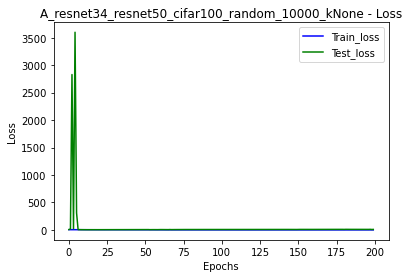

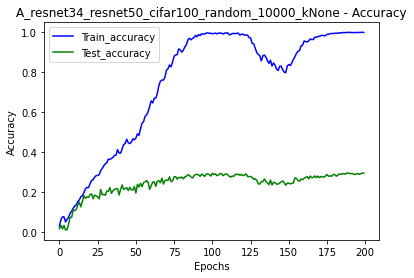

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 10000,
 'QueryType': 'random',
 'Test Accuracy': 29.27,
 'Test Loss': 8.9758,
 'Train Accuracy': 99.82,
 'Train Loss': 0.0087,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using random with query size 25000
	- input:50000 sampled:25000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: random	Query Size: 25000	Logits: None
-----------------------------------------------------------------------------


100%|███████████████████████████████████████████| 80/80 [26:30<00:00, 19.88s/it]


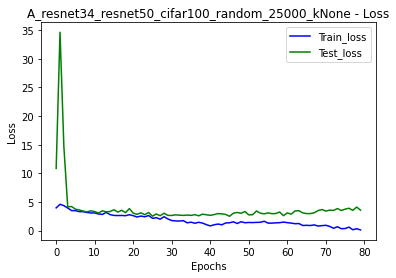

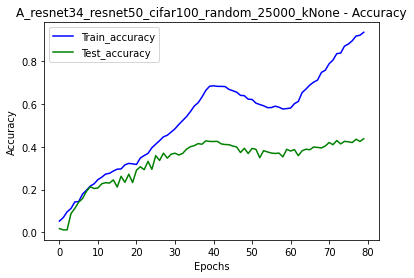

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 25000,
 'QueryType': 'random',
 'Test Accuracy': 43.73,
 'Test Loss': 3.5727,
 'Train Accuracy': 93.48,
 'Train Loss': 0.1279,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
Loading queried cifar100 dataset with resnet50 victim
	- input:50000 queried:50000
Sampling using random with query size 50000
	- input:50000 sampled:50000

-----------------------------------------------------------------------------
	Dataset: cifar100
	Victim: resnet50	Attacker: resnet34
	Query Type: random	Query Size: 50000	Logits: None
-----------------------------------------------------------------------------


100%|███████████████████████████████████████████| 40/40 [24:55<00:00, 37.38s/it]


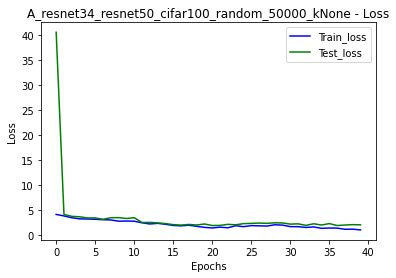

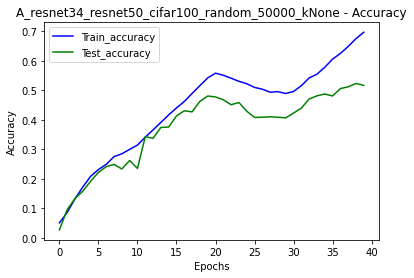

{'Attacker': 'resnet34',
 'Dataset': 'cifar100',
 'Queried Logits': None,
 'QuerySize': 50000,
 'QueryType': 'random',
 'Test Accuracy': 51.68,
 'Test Loss': 2.0582,
 'Train Accuracy': 69.7,
 'Train Loss': 1.0414,
 'Victim': 'resnet50'}
-----------------------------------------------------------------------------
[{'Attacker': 'resnet34',
  'Dataset': 'cifar100',
  'Queried Logits': None,
  'QuerySize': 5000,
  'QueryType': 'coreset',
  'Test Accuracy': 21.94,
  'Test Loss': 16.7435,
  'Train Accuracy': 100.0,
  'Train Loss': 1e-04,
  'Victim': 'resnet50'},
 {'Attacker': 'resnet34',
  'Dataset': 'cifar100',
  'Queried Logits': None,
  'QuerySize': 10000,
  'QueryType': 'coreset',
  'Test Accuracy': 28.28,
  'Test Loss': 9.6687,
  'Train Accuracy': 99.94,
  'Train Loss': 0.0069,
  'Victim': 'resnet50'},
 {'Attacker': 'resnet34',
  'Dataset': 'cifar100',
  'Queried Logits': None,
  'QuerySize': 25000,
  'QueryType': 'coreset',
  'Test Accuracy': 42.04,
  'Test Loss': 3.9969,
  'Train Acc

In [4]:
investigate(case1_cifar100, seed=42)